In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [3]:
# Importing the dataset
ds = pd.read_csv(r"C:\Users\91942\Desktop\Adhya\LEAD SCORING Case Study\Leads.csv")

In [4]:
ds.shape

(9240, 37)

In [5]:
ds.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
ds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Finding the null values 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Data Cleaning and Preparation
ds.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# Eliminating the columns 
for c in ds.columns:
    if ds[c].isnull().sum()>3000:
        ds.drop(c, axis=1,inplace=True)

In [10]:
ds.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [11]:
ds['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [12]:
# dropping the variable "City" since it's not useful for our analysis
ds.drop(['City'], axis = 1, inplace = True)

In [13]:
#checking the counts of "Country" 
ds['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [14]:
ds.drop(['Country'], axis = 1, inplace = True)

In [15]:
# Finding the percentage of missing values in each column

round(100*(ds.isnull().sum()/len(ds.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
ds.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

### Visualization

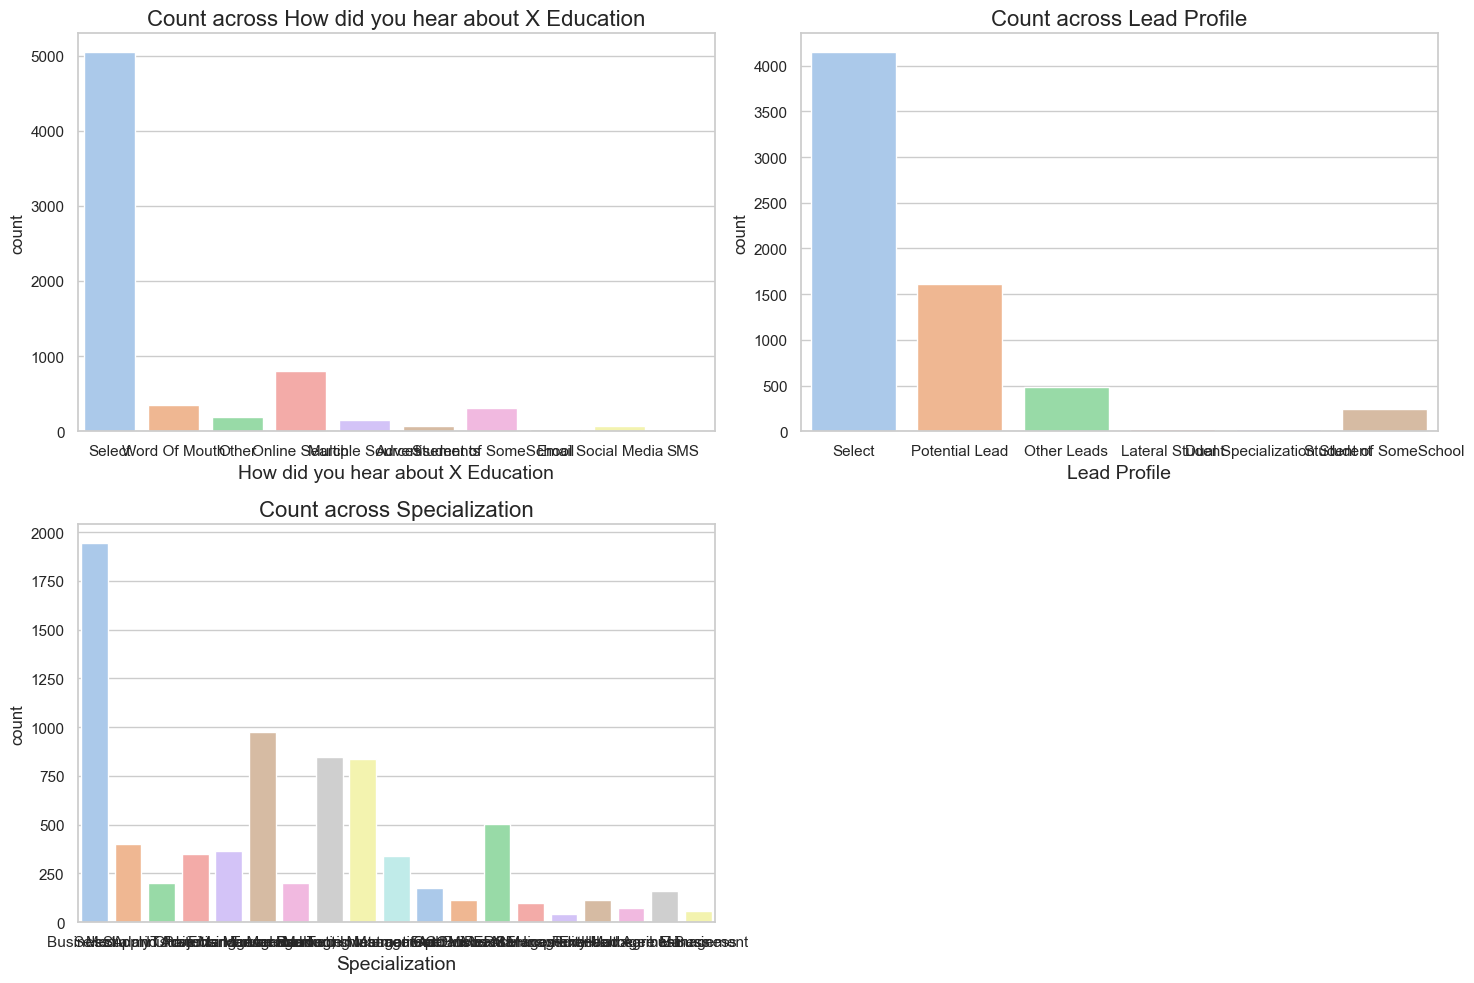

In [17]:
def countplot(x, fig):
    plt.subplot(2, 2, fig)
    sns.countplot(data=ds, x=x, palette= 'pastel')
    plt.title('Count across ' + x, size=16)
    plt.xlabel(x, size=14)
plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()


In [18]:
for c in ds:
    print(ds[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [19]:
ds['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
ds['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [21]:
ds['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Visualizing the features

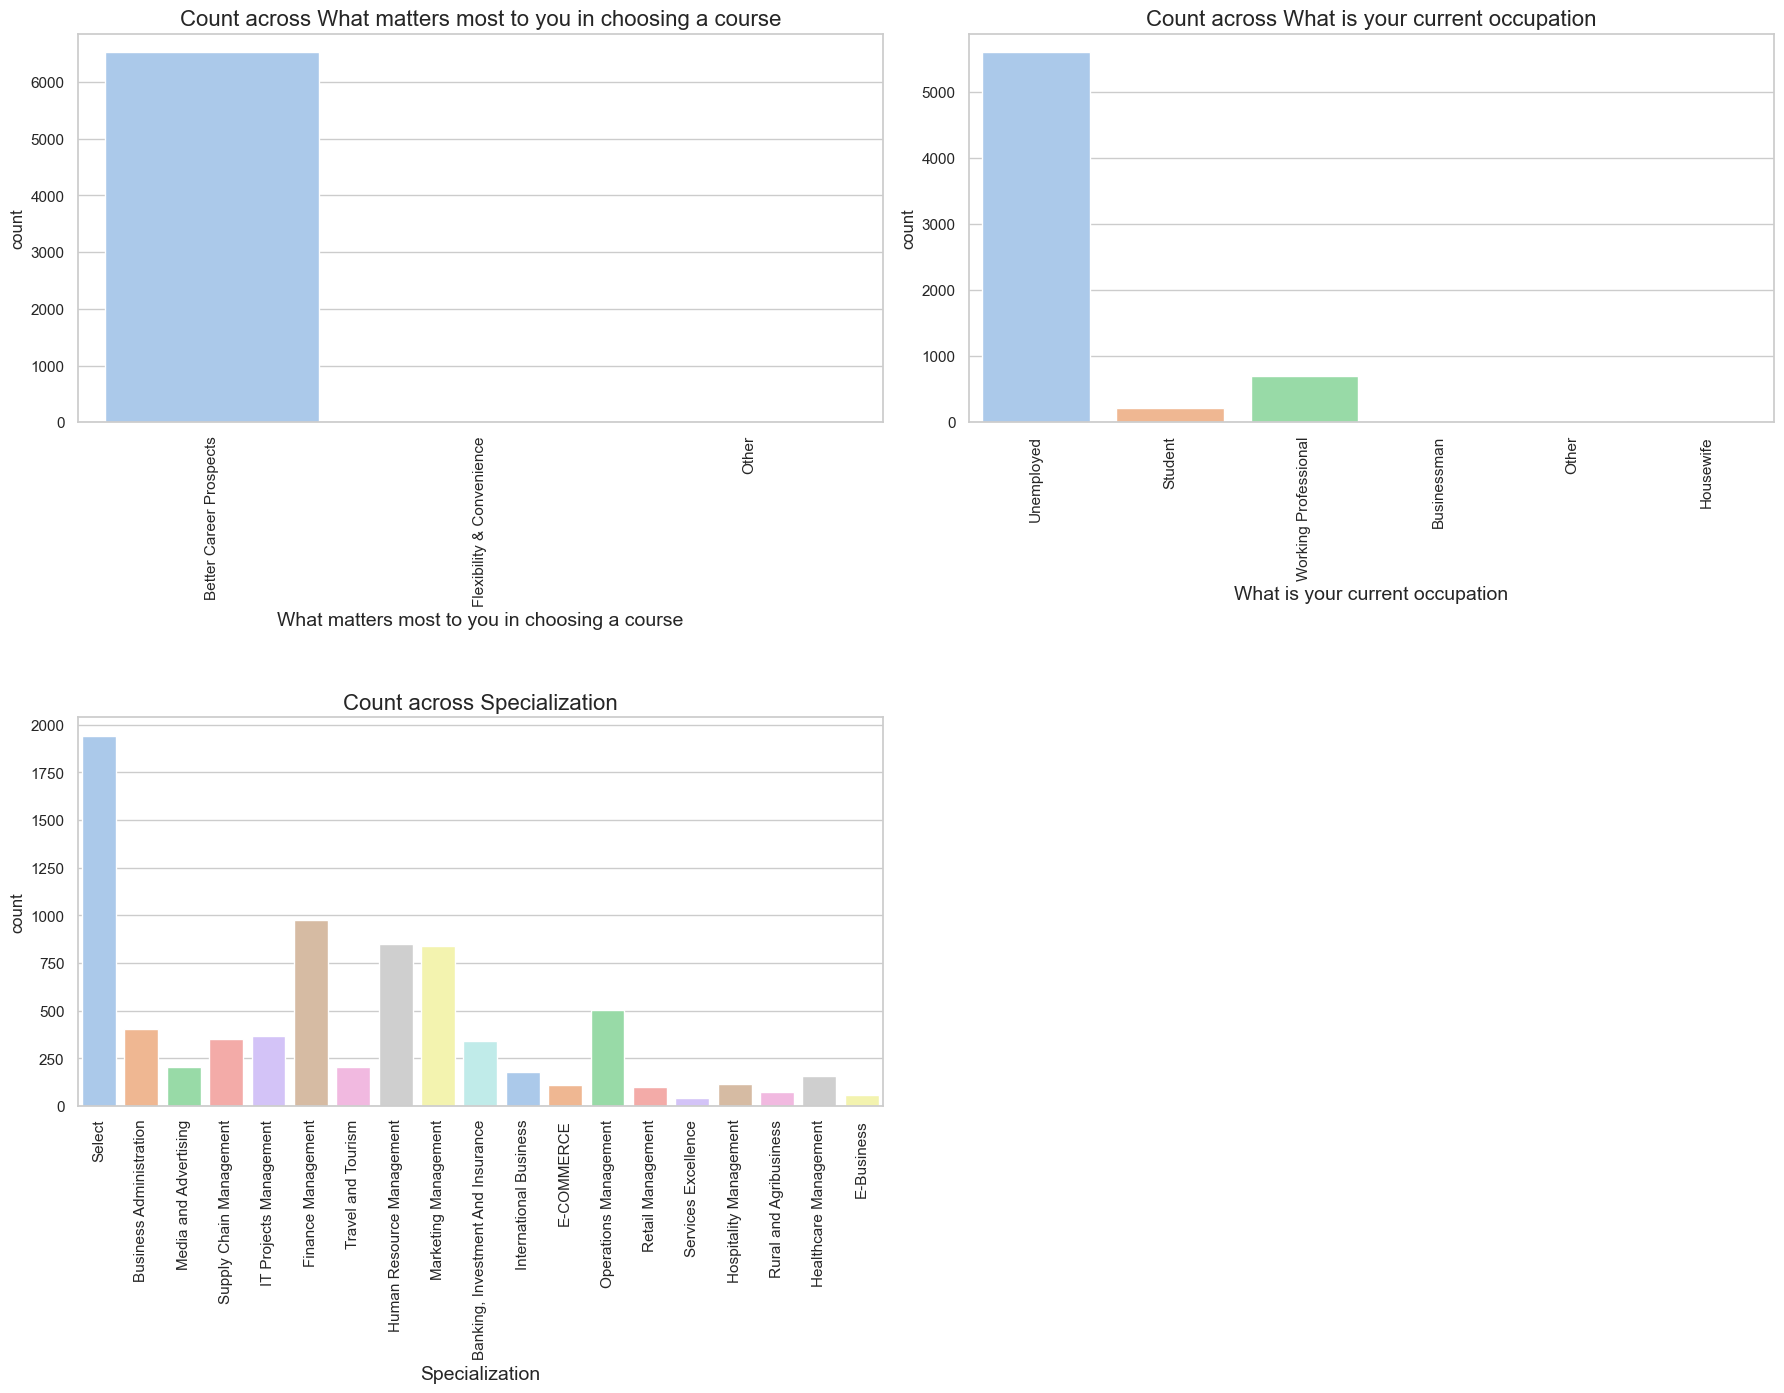

In [22]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot (data=ds, x=x, palette= 'pastel')
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

In [23]:
# dropping unwanted columns
ds.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

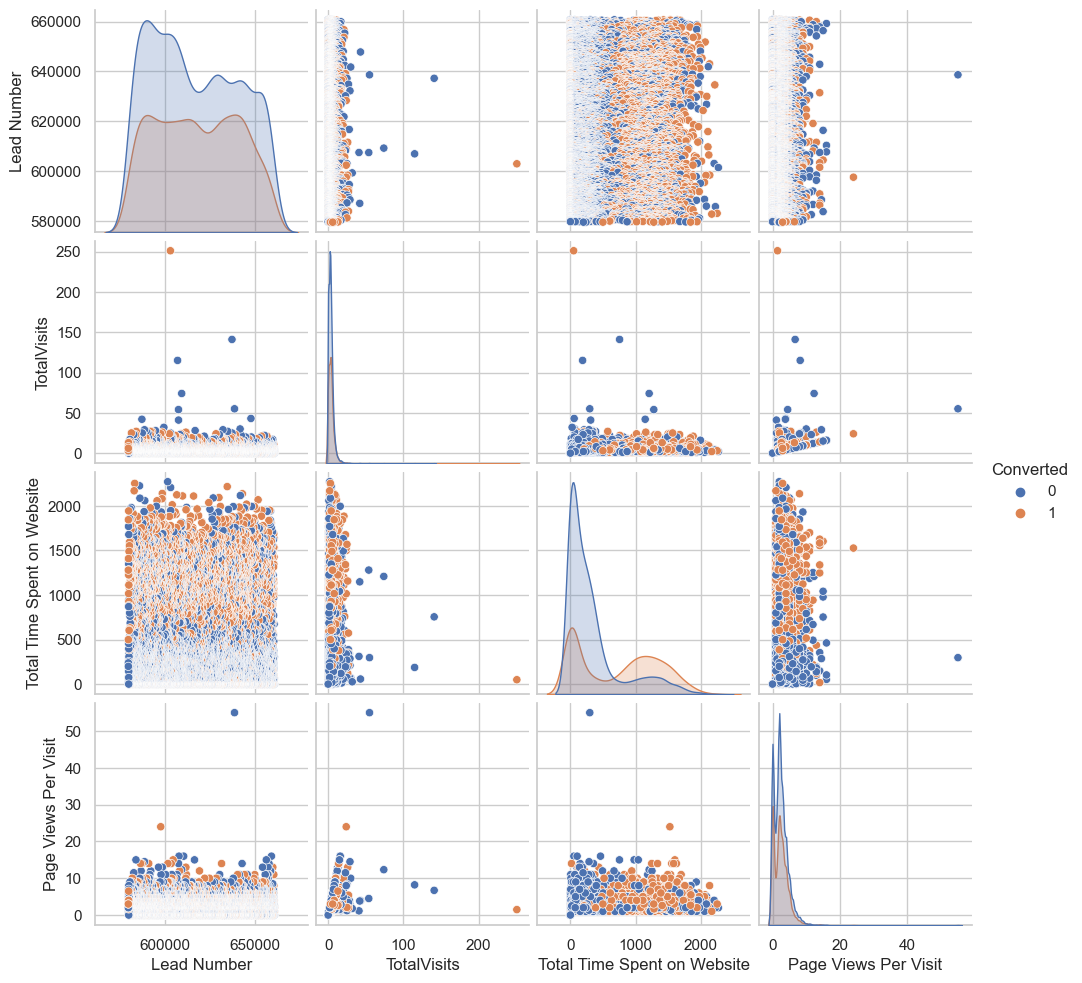

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(ds,diag_kind='kde',hue='Converted')
plt.show()

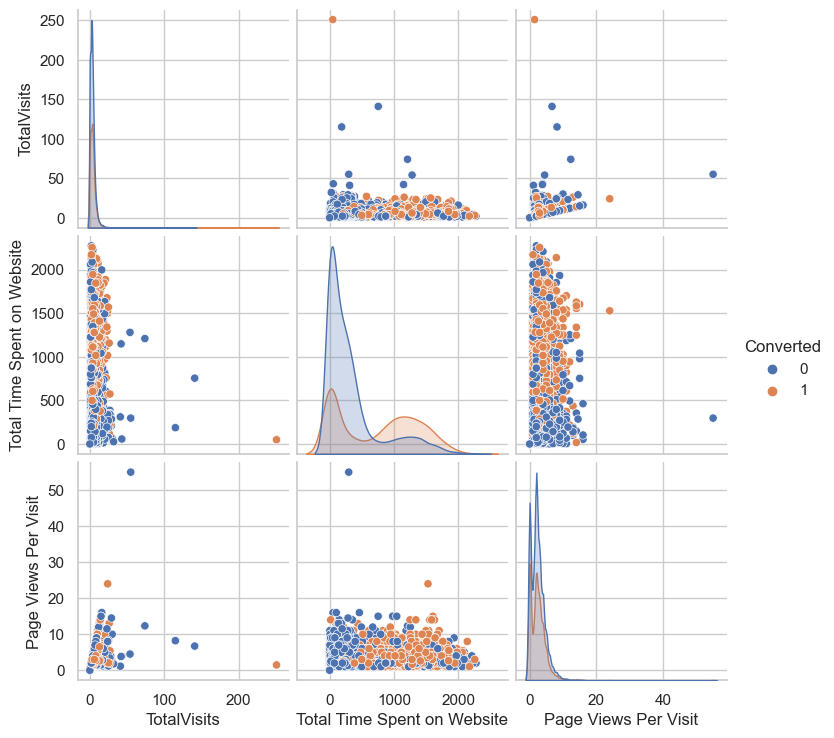

In [25]:
x_edu = ds[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


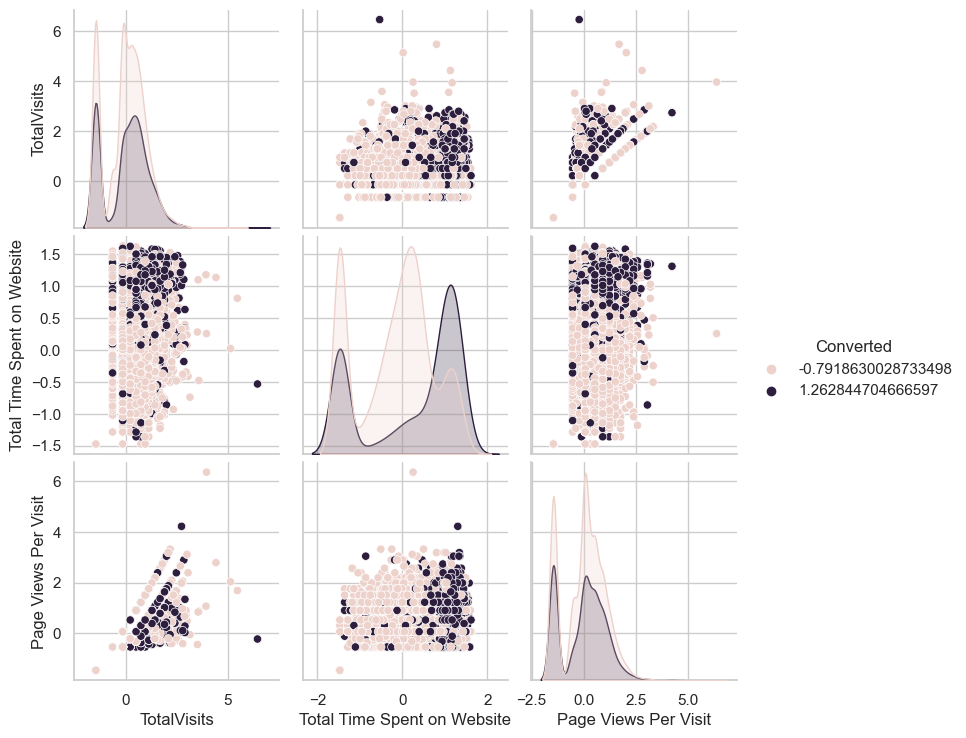

In [27]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [28]:
ds.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [29]:
ds['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
ds.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [31]:
# Checking the number of null values again
ds.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
ds = ds[~pd.isnull(ds['What is your current occupation'])]

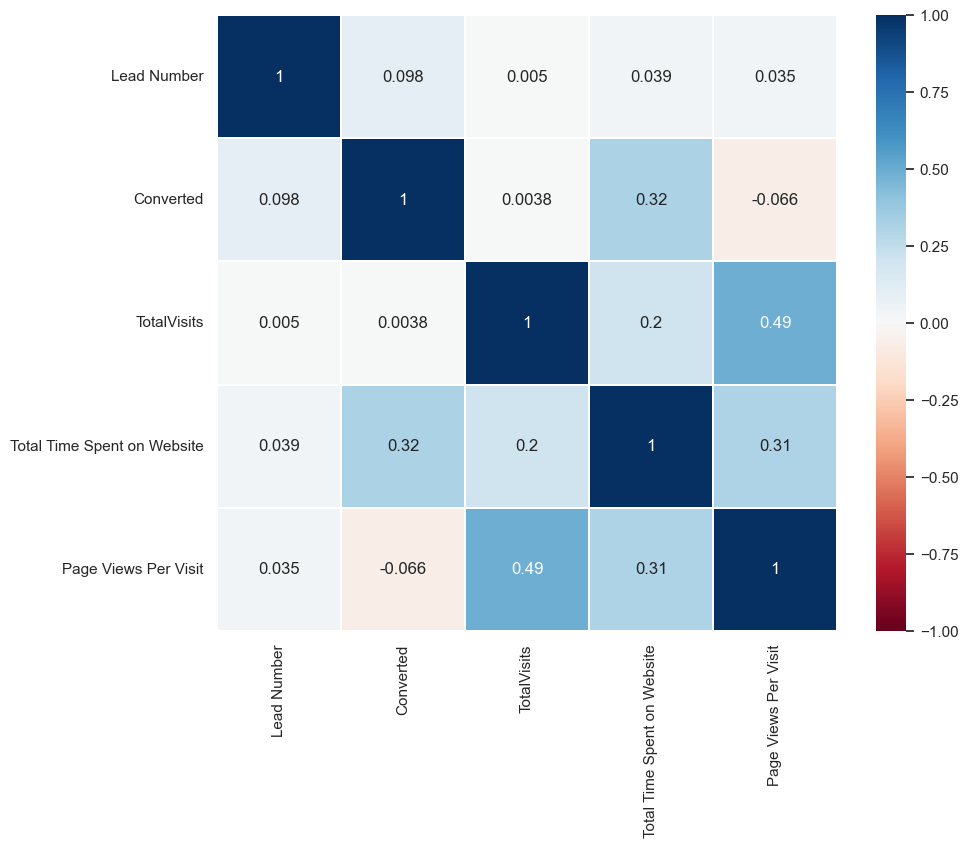

In [33]:
plt.figure(figsize=(10,8))

sns.heatmap(ds.corr(), annot=True,cmap="RdBu", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

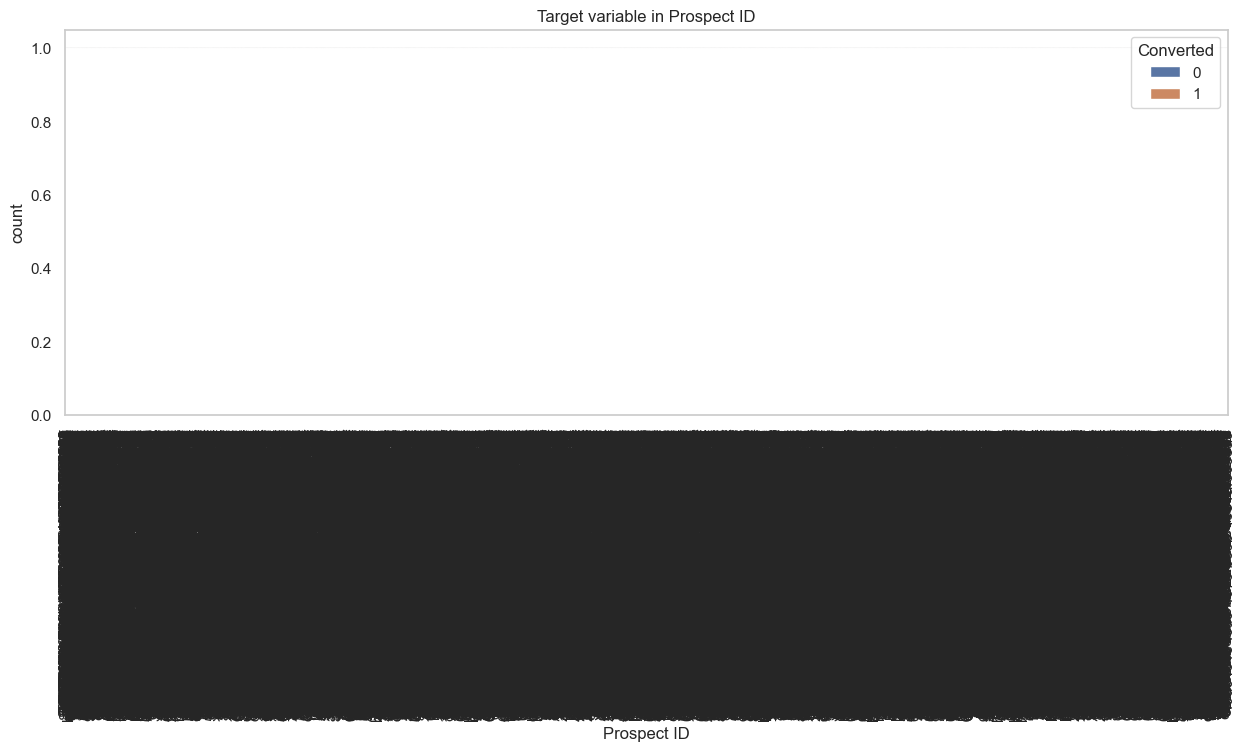

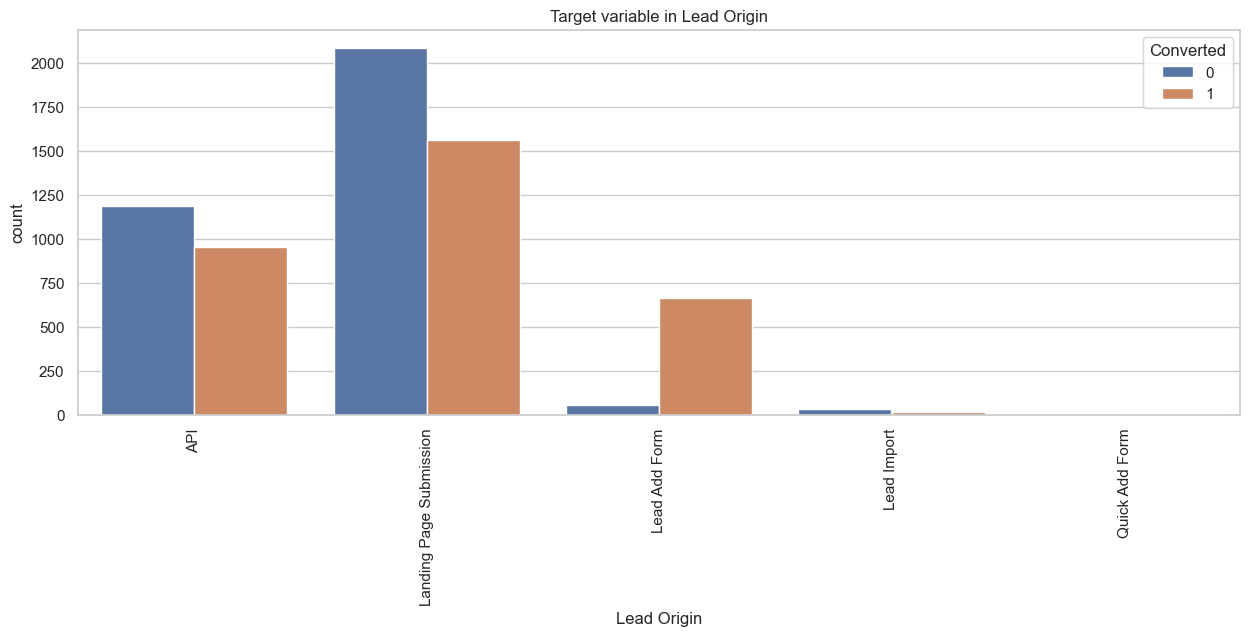

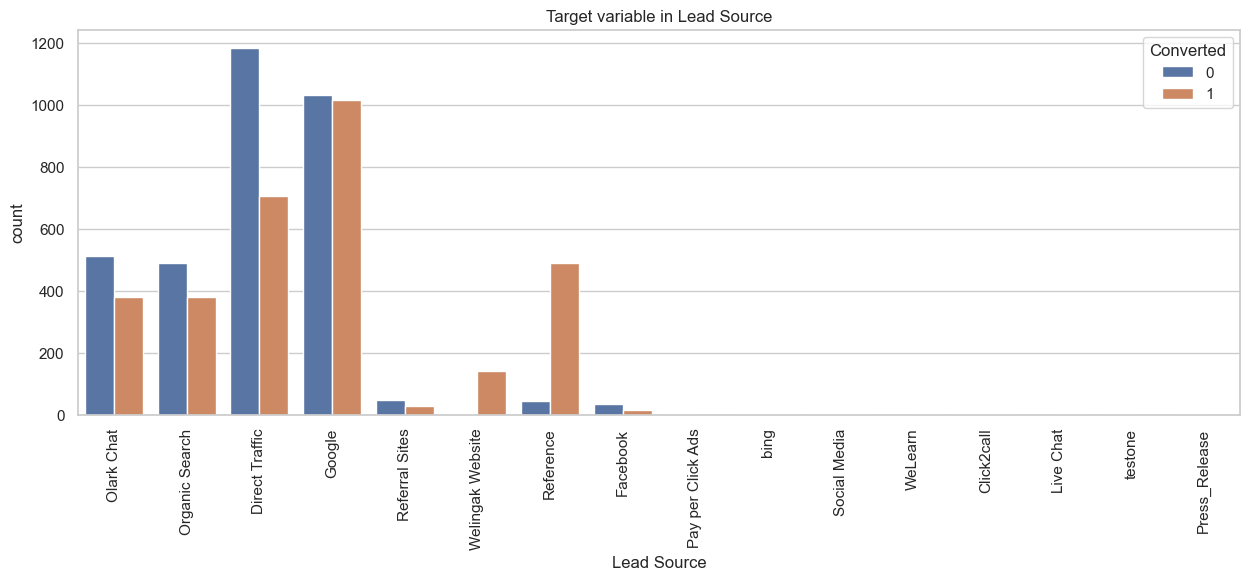

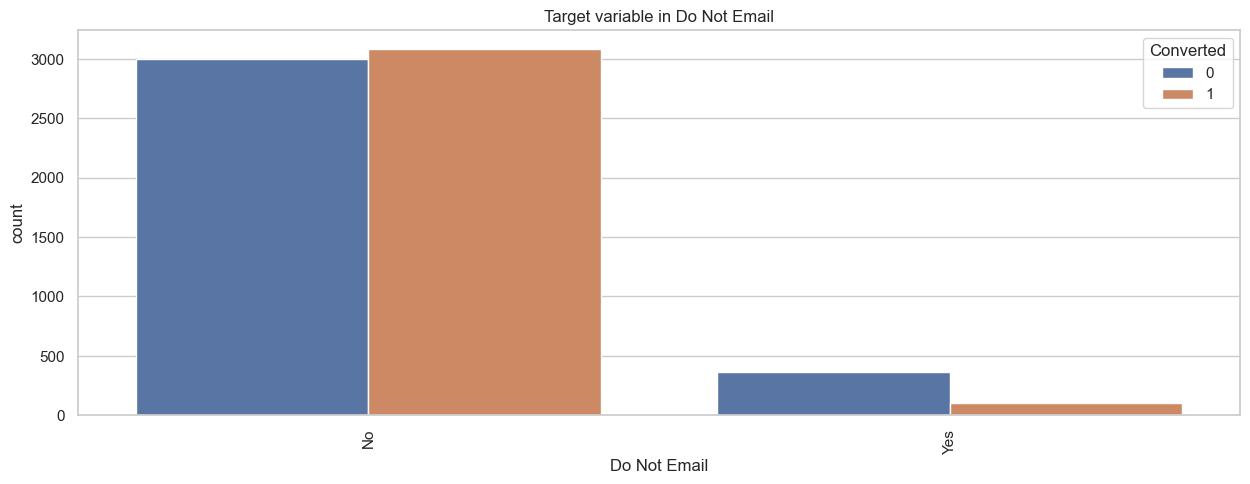

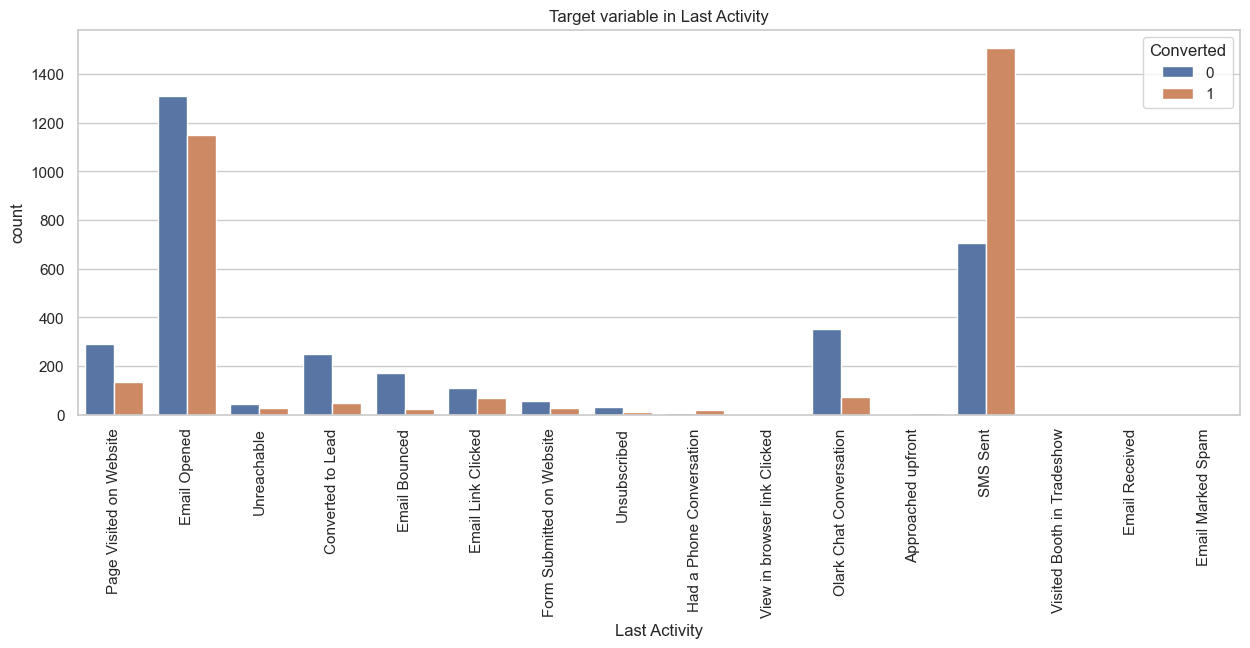

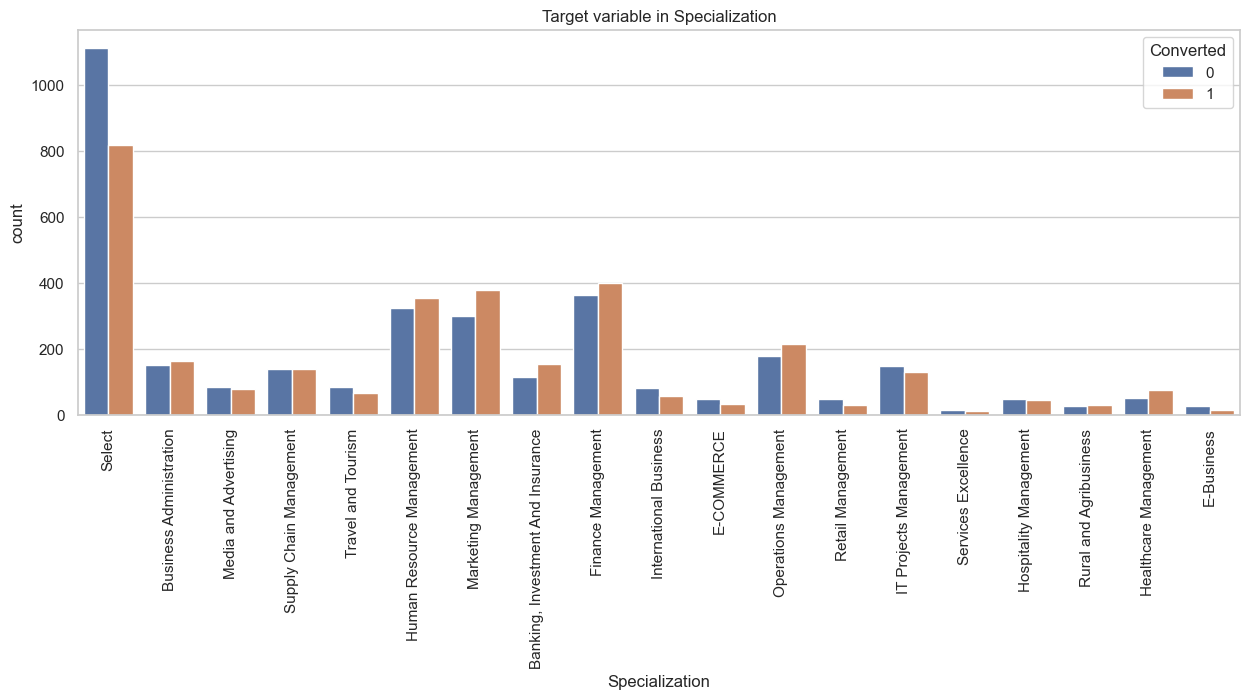

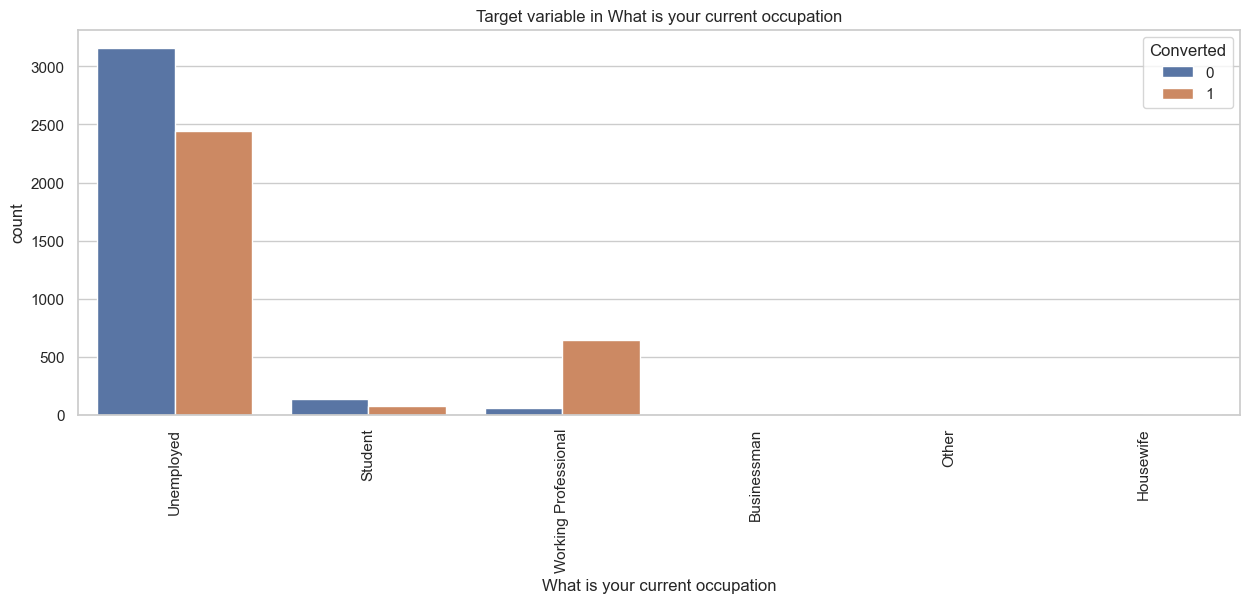

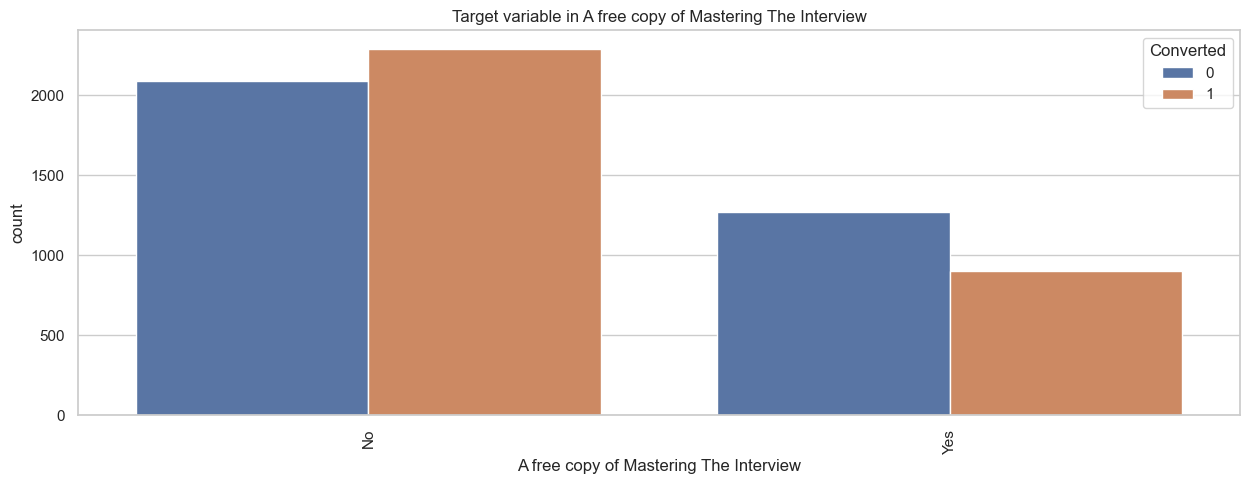

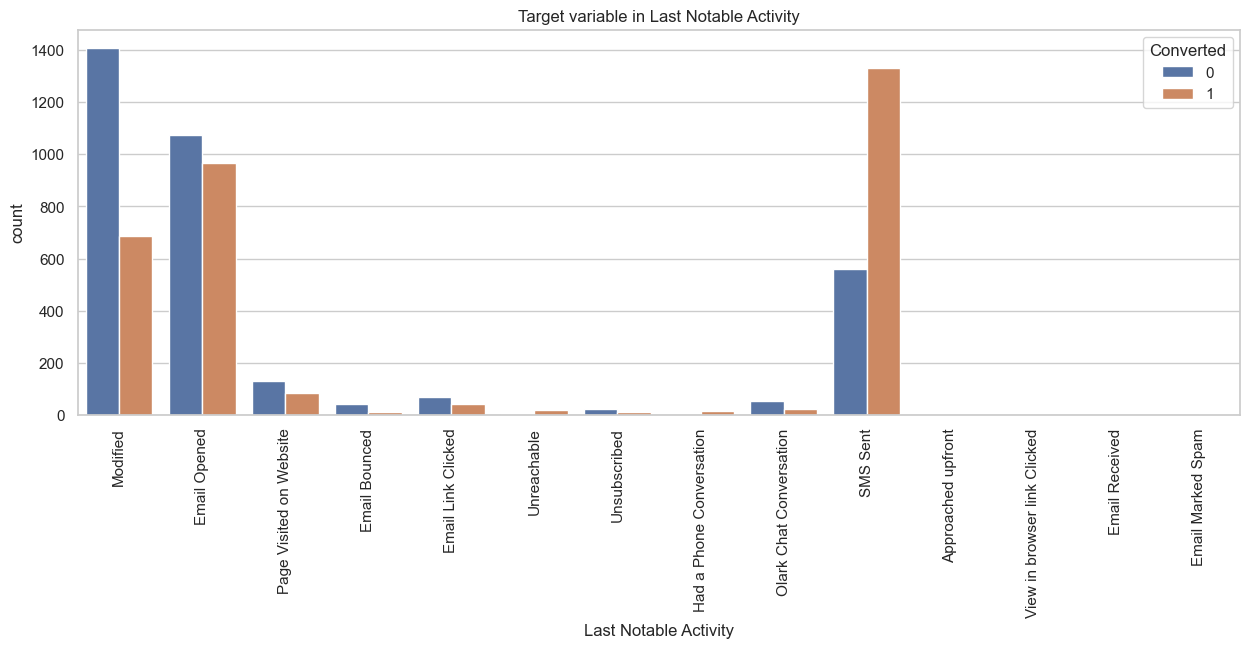

In [34]:
conv = ds.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize=(15, 5))
    sns.countplot(data=ds, x=i, hue='Converted')
    plt.xticks(rotation=90)
    plt.title('Target variable in ' + i)
    plt.show()

In [35]:
ds.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [36]:
# Dropping the null values in 'TotalVisits'

ds = ds[~pd.isnull(ds['TotalVisits'])]

In [37]:
# Checking the number of null values again
ds.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [38]:
# Dropping the null values in 'Lead Source'
ds = ds[~pd.isnull(ds['Lead Source'])]

In [39]:
ds.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [40]:
# Dropping the null values in 'Specialization'

ds = ds[~pd.isnull(ds['Specialization'])]

In [41]:
ds.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [42]:
print(len(ds.index))
print(len(ds.index)/9240)

6373
0.6897186147186147


In [43]:
ds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Since variables 'Prospect ID' and 'Lead Number' won't be of any use in our analysis, we can drop them.

In [44]:
# Dropping unwanted columns 
ds.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [45]:
ds.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Categorical variables 

In [46]:
# Checking the columns of type 'object'

temp = ds.loc[:, ds.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
df2 = pd.DataFrame({'P': ['p', 'q', 'p']})
df2

,P
0,p
1,q
2,p


In [48]:
pd.get_dummies(df2)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [49]:
pd.get_dummies(df2, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [50]:
# Creating dummy variables 
dummy = pd.get_dummies(ds[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

lds = pd.concat([ds, dummy], axis=1)

In [51]:
dummy_spl = pd.get_dummies(ds['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
ds = pd.concat([ds, dummy_spl], axis = 1)

In [52]:
# Dropping the variables 

ds = ds.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [53]:
ds.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split

In [54]:
# Import `train_test_split` library
# Putting all the feature variables in X

X = ds.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
y = ds['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 21)
y_train Size (4461,)


In [58]:
# Import 'MinMax scaler' Library
# Scaling the three numeric features 

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


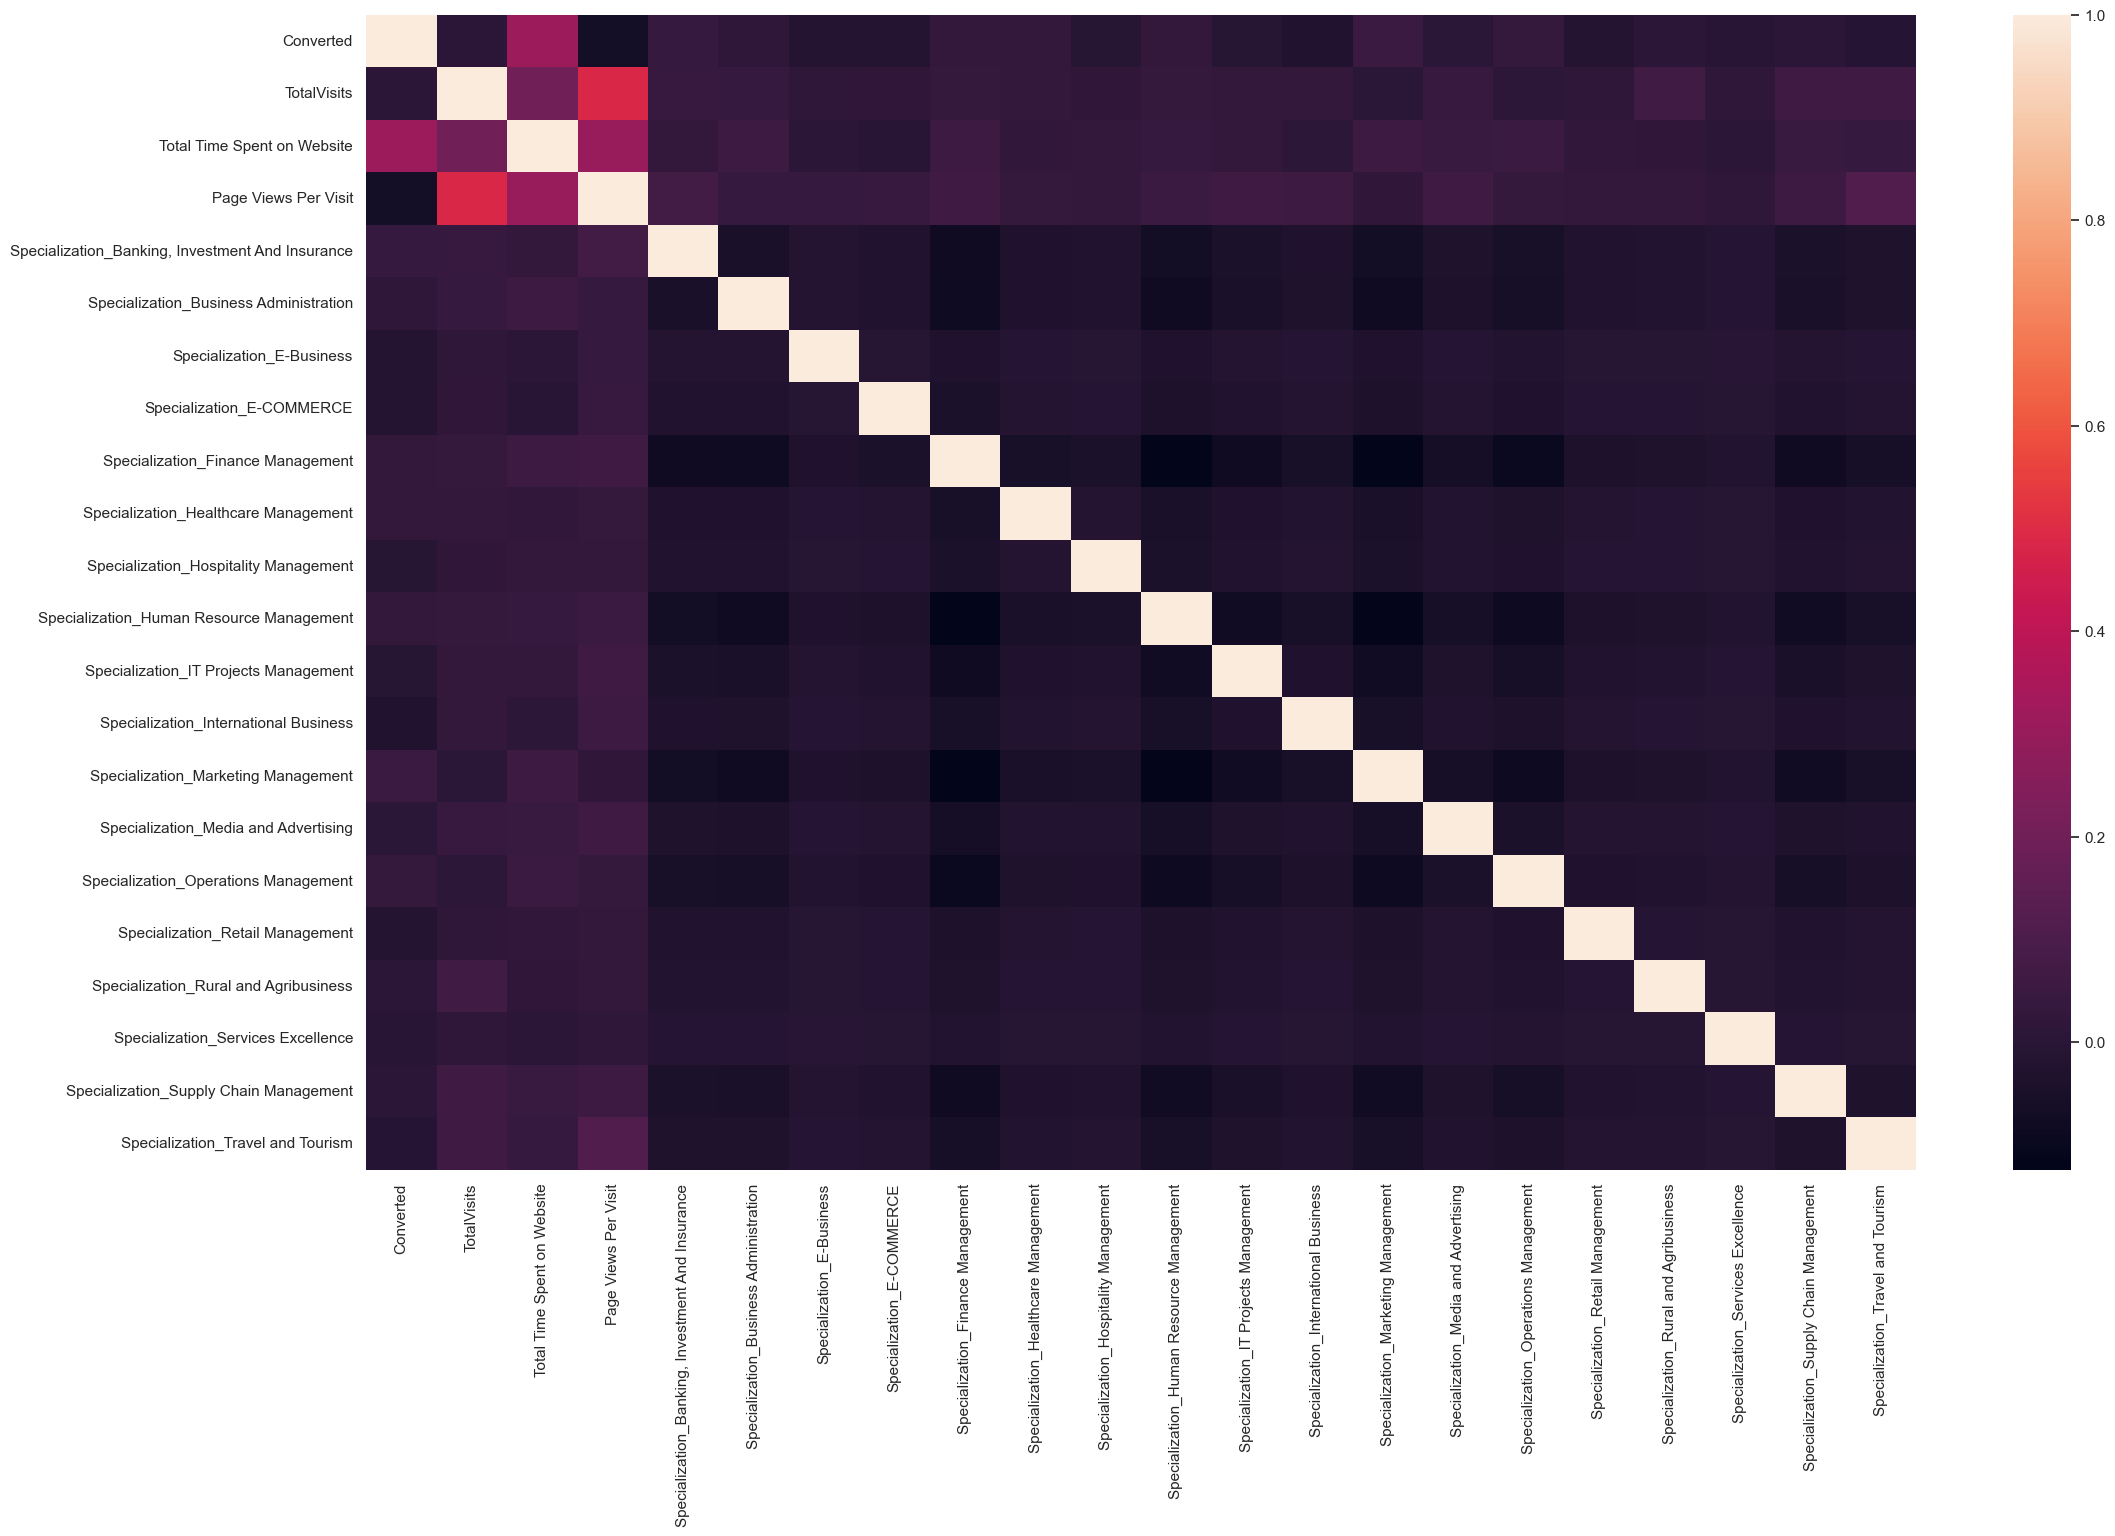

In [59]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(ds.corr())
plt.show()

##  Model Building

In [172]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [173]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 6),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 5),
 ('Specialization_International Business', False, 4),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Retail Management', False, 2),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence', True, 1),
 ('Specialization_Supply Chain Management', True, 1),
 ('Specializa

In [84]:
col = X_train.columns[rfe.support_]

In [85]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [86]:
# Importing 'statsmodels'

### Model 1

In [87]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.1
Date:                Tue, 22 Aug 2023   Deviance:                       5528.2
Time:                        22:47:34   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1356
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4691      0.060     -7.868      0.000      -0.586      -0.352
TotalVisits                                          3.2277      2.221      1.453      0.146      -1.125       7.580
Total Time Spent on Website                          3.2618      0.154     21.181      0.000       2.960       3.564
Page Views Per Visit                                -4.2262      0.346    -12.223      0.000      -4.904      -3.549
Specialization_Banking, Investment And Insurance     0.8846      0.174      5.079      0.000       0.543       1.226
Specialization_Business Administration               0.3594      0.151      2.385      0.017       0.064       0.655
Specialization_E-COMMERCE                            0.2981      0.288      1.034      0.301      -0.267       0.863
Specialization_Finance Management                    0.3413      0.109      3.143      0.002       0.128       0.554
Specialization_Healthcare Management                 0.6992      0.240      2.918      0.004       0.230       1.169
Specialization_Human Resource Management             0.3988      0.111      3.580      0.000       0.180       0.617
Specialization_Marketing Management                  0.4657      0.112      4.149      0.000       0.246       0.686
Specialization_Media and Advertising                 0.2124      0.225      0.945      0.345      -0.228       0.653
Specialization_Operations Management                 0.3184      0.144      2.211      0.027       0.036       0.601
Specialization_Rural and Agribusiness                0.2163      0.356      0.608      0.543      -0.481       0.913
Specialization_Services Excellence                  -0.4182      0.652     -0.641      0.521      -1.697       0.861
Specialization_Supply Chain Management               0.2997      0.171      1.748      0.080      -0.036       0.636
====================================================================================================================
"""

### Checking `VIF`

In [88]:
# Import 'variance_inflation_factor' library
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.89
1,Total Time Spent on Website,2.02
0,TotalVisits,1.81
6,Specialization_Finance Management,1.20
8,Specialization_Human Resource Management,1.17
9,Specialization_Marketing Management,1.17
4,Specialization_Business Administration,1.10
11,Specialization_Operations Management,1.10
3,"Specialization_Banking, Investment And Insurance",1.08
14,Specialization_Supply Chain Management,1.08


Let's drop 'Lead Source_Reference' since it has a high p-value and a high VIF.

In [89]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

KeyError: "['Lead Source_Reference'] not found in axis"

### Model 2

In [90]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.1
Date:                Tue, 22 Aug 2023   Deviance:                       5528.2
Time:                        22:48:22   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1356
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4691      0.060     -7.868      0.000      -0.586      -0.352
TotalVisits                                          3.2277      2.221      1.453      0.146      -1.125       7.580
Total Time Spent on Website                          3.2618      0.154     21.181      0.000       2.960       3.564
Page Views Per Visit                                -4.2262      0.346    -12.223      0.000      -4.904      -3.549
Specialization_Banking, Investment And Insurance     0.8846      0.174      5.079      0.000       0.543       1.226
Specialization_Business Administration               0.3594      0.151      2.385      0.017       0.064       0.655
Specialization_E-COMMERCE                            0.2981      0.288      1.034      0.301      -0.267       0.863
Specialization_Finance Management                    0.3413      0.109      3.143      0.002       0.128       0.554
Specialization_Healthcare Management                 0.6992      0.240      2.918      0.004       0.230       1.169
Specialization_Human Resource Management             0.3988      0.111      3.580      0.000       0.180       0.617
Specialization_Marketing Management                  0.4657      0.112      4.149      0.000       0.246       0.686
Specialization_Media and Advertising                 0.2124      0.225      0.945      0.345      -0.228       0.653
Specialization_Operations Management                 0.3184      0.144      2.211      0.027       0.036       0.601
Specialization_Rural and Agribusiness                0.2163      0.356      0.608      0.543      -0.481       0.913
Specialization_Services Excellence                  -0.4182      0.652     -0.641      0.521      -1.697       0.861
Specialization_Supply Chain Management               0.2997      0.171      1.748      0.080      -0.036       0.636
====================================================================================================================
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.89
1,Total Time Spent on Website,2.02
0,TotalVisits,1.81
6,Specialization_Finance Management,1.20
8,Specialization_Human Resource Management,1.17
9,Specialization_Marketing Management,1.17
4,Specialization_Business Administration,1.10
11,Specialization_Operations Management,1.10
3,"Specialization_Banking, Investment And Insurance",1.08
14,Specialization_Supply Chain Management,1.08


let's drop the ones with the high p-values starting with 'Last Notable Activity_Had a Phone Conversation'.

In [93]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

KeyError: "['Last Notable Activity_Had a Phone Conversation'] not found in axis"

### Model 3

In [94]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.1
Date:                Tue, 22 Aug 2023   Deviance:                       5528.2
Time:                        22:48:32   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1356
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4691      0.060     -7.868      0.000      -0.586      -0.352
TotalVisits                                          3.2277      2.221      1.453      0.146      -1.125       7.580
Total Time Spent on Website                          3.2618      0.154     21.181      0.000       2.960       3.564
Page Views Per Visit                                -4.2262      0.346    -12.223      0.000      -4.904      -3.549
Specialization_Banking, Investment And Insurance     0.8846      0.174      5.079      0.000       0.543       1.226
Specialization_Business Administration               0.3594      0.151      2.385      0.017       0.064       0.655
Specialization_E-COMMERCE                            0.2981      0.288      1.034      0.301      -0.267       0.863
Specialization_Finance Management                    0.3413      0.109      3.143      0.002       0.128       0.554
Specialization_Healthcare Management                 0.6992      0.240      2.918      0.004       0.230       1.169
Specialization_Human Resource Management             0.3988      0.111      3.580      0.000       0.180       0.617
Specialization_Marketing Management                  0.4657      0.112      4.149      0.000       0.246       0.686
Specialization_Media and Advertising                 0.2124      0.225      0.945      0.345      -0.228       0.653
Specialization_Operations Management                 0.3184      0.144      2.211      0.027       0.036       0.601
Specialization_Rural and Agribusiness                0.2163      0.356      0.608      0.543      -0.481       0.913
Specialization_Services Excellence                  -0.4182      0.652     -0.641      0.521      -1.697       0.861
Specialization_Supply Chain Management               0.2997      0.171      1.748      0.080      -0.036       0.636
====================================================================================================================
"""

Let's drop 'What is your current occupation_Housewife' since it has high P value

In [95]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

KeyError: "['What is your current occupation_Housewife'] not found in axis"

### Model 4

In [96]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.1
Date:                Tue, 22 Aug 2023   Deviance:                       5528.2
Time:                        22:48:35   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1356
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4691      0.060     -7.868      0.000      -0.586      -0.352
TotalVisits                                          3.2277      2.221      1.453      0.146      -1.125       7.580
Total Time Spent on Website                          3.2618      0.154     21.181      0.000       2.960       3.564
Page Views Per Visit                                -4.2262      0.346    -12.223      0.000      -4.904      -3.549
Specialization_Banking, Investment And Insurance     0.8846      0.174      5.079      0.000       0.543       1.226
Specialization_Business Administration               0.3594      0.151      2.385      0.017       0.064       0.655
Specialization_E-COMMERCE                            0.2981      0.288      1.034      0.301      -0.267       0.863
Specialization_Finance Management                    0.3413      0.109      3.143      0.002       0.128       0.554
Specialization_Healthcare Management                 0.6992      0.240      2.918      0.004       0.230       1.169
Specialization_Human Resource Management             0.3988      0.111      3.580      0.000       0.180       0.617
Specialization_Marketing Management                  0.4657      0.112      4.149      0.000       0.246       0.686
Specialization_Media and Advertising                 0.2124      0.225      0.945      0.345      -0.228       0.653
Specialization_Operations Management                 0.3184      0.144      2.211      0.027       0.036       0.601
Specialization_Rural and Agribusiness                0.2163      0.356      0.608      0.543      -0.481       0.913
Specialization_Services Excellence                  -0.4182      0.652     -0.641      0.521      -1.697       0.861
Specialization_Supply Chain Management               0.2997      0.171      1.748      0.080      -0.036       0.636
====================================================================================================================
"""

Let's drop 'What is your current occupation_Working Professional` since it has high P value

In [97]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

KeyError: "['What is your current occupation_Working Professional'] not found in axis"

### Model 4

In [98]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.1
Date:                Tue, 22 Aug 2023   Deviance:                       5528.2
Time:                        22:48:38   Pearson chi2:                 4.57e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1356
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.4691      0.060     -7.868      0.000      -0.586      -0.352
TotalVisits                                          3.2277      2.221      1.453      0.146      -1.125       7.580
Total Time Spent on Website                          3.2618      0.154     21.181      0.000       2.960       3.564
Page Views Per Visit                                -4.2262      0.346    -12.223      0.000      -4.904      -3.549
Specialization_Banking, Investment And Insurance     0.8846      0.174      5.079      0.000       0.543       1.226
Specialization_Business Administration               0.3594      0.151      2.385      0.017       0.064       0.655
Specialization_E-COMMERCE                            0.2981      0.288      1.034      0.301      -0.267       0.863
Specialization_Finance Management                    0.3413      0.109      3.143      0.002       0.128       0.554
Specialization_Healthcare Management                 0.6992      0.240      2.918      0.004       0.230       1.169
Specialization_Human Resource Management             0.3988      0.111      3.580      0.000       0.180       0.617
Specialization_Marketing Management                  0.4657      0.112      4.149      0.000       0.246       0.686
Specialization_Media and Advertising                 0.2124      0.225      0.945      0.345      -0.228       0.653
Specialization_Operations Management                 0.3184      0.144      2.211      0.027       0.036       0.601
Specialization_Rural and Agribusiness                0.2163      0.356      0.608      0.543      -0.481       0.913
Specialization_Services Excellence                  -0.4182      0.652     -0.641      0.521      -1.697       0.861
Specialization_Supply Chain Management               0.2997      0.171      1.748      0.080      -0.036       0.636
====================================================================================================================
"""

## Checking final VIF

In [99]:
# Making a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.89
1,Total Time Spent on Website,2.02
0,TotalVisits,1.81
6,Specialization_Finance Management,1.20
8,Specialization_Human Resource Management,1.17
9,Specialization_Marketing Management,1.17
4,Specialization_Business Administration,1.10
11,Specialization_Operations Management,1.10
3,"Specialization_Banking, Investment And Insurance",1.08
14,Specialization_Supply Chain Management,1.08


### Step 3: Model Evaluation

In [100]:
# Using 'predict' to predict the probabilities
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.299490
218     0.308556
4171    0.134148
4037    0.384835
3660    0.468088
207     0.229434
2044    0.391977
6411    0.829181
6498    0.570440
2085    0.384835
dtype: float64

In [101]:
# Reshaping it 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29949018, 0.30855599, 0.13414798, 0.38483506, 0.46808791,
       0.229434  , 0.39197719, 0.82918141, 0.57043994, 0.38483506])

In [102]:
# Create a new dataframe consisting of the actual conversion flag & probabilities predicted by the model.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.299490
1,0,0.308556
2,1,0.134148
3,1,0.384835
4,1,0.468088


In [103]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.299490,0
1,0,0.308556,0
2,1,0.134148,0
3,1,0.384835,0
4,1,0.468088,0


#### Import the 'metrics' library from sklearn

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1811  501]
 [1038 1111]]


In [105]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.6550100874243443


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Calculate 'sensitivity'

TP/(TP+FN)

0.5169846440204746

In [108]:
# Calculate 'specificity'

TN/(TN+FP)

0.7833044982698962

In [109]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

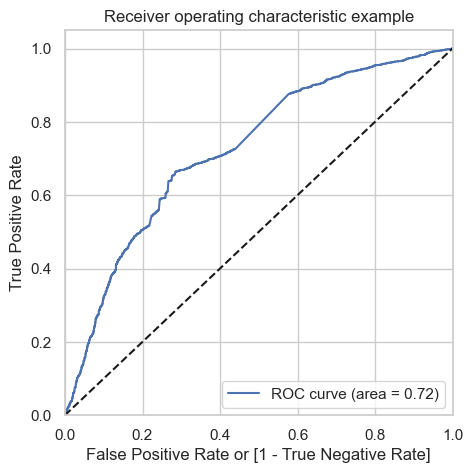

In [111]:
# Calling ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [112]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299490,0,1,1,1,0,0,0,0,0,0,0
1,0,0.308556,0,1,1,1,1,0,0,0,0,0,0
2,1,0.134148,0,1,1,0,0,0,0,0,0,0,0
3,1,0.384835,0,1,1,1,1,0,0,0,0,0,0
4,1,0.468088,0,1,1,1,1,1,0,0,0,0,0


In [113]:
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.485541  0.998139  0.009083
0.2   0.2  0.509975  0.985575  0.067907
0.3   0.3  0.567586  0.948348  0.213668
0.4   0.4  0.649630  0.708702  0.594723
0.5   0.5  0.655010  0.516985  0.783304
0.6   0.6  0.647837  0.412285  0.866782
0.7   0.7  0.605470  0.274546  0.913062
0.8   0.8  0.550773  0.103304  0.966696
0.9   0.9  0.519166  0.005584  0.996540


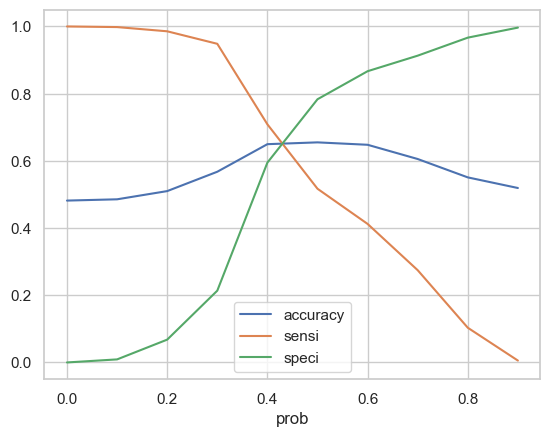

In [114]:
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299490,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.308556,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.134148,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.384835,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.468088,0,1,1,1,1,1,0,0,0,0,0,1


In [116]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6635283568706568

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1473,  839],
       [ 662, 1487]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Calculate 'Sensitivity'

TP/(TP+FN)

0.6919497440670079

In [120]:
# Calculate 'Specificity'

TN/(TN+FP)

0.6371107266435986

#### Let's now make predicitons on the test set

In [121]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [122]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management
4771,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0.4375,0,0,0,0,0,1,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,0,0,0,1,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,0,1,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
X_test_sm = sm.add_constant(X_test[col])

In [124]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management
4771,1.0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0.43750,0,0,0,0,0,1,0,0,0,0,0,0
9202,1.0,0.015936,0.416813,0.25000,0,0,0,1,0,0,0,0,0,0,0,0
6570,1.0,0.011952,0.378961,0.18750,0,1,0,0,0,0,0,0,0,0,0,0
2668,1.0,0.031873,0.395246,0.25000,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0.09375,0,1,0,0,0,0,0,0,0,0,0,0
6583,1.0,0.011952,0.152289,0.18750,0,0,0,0,0,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0.87500,0,0,0,0,0,0,0,0,0,0,0,0
3056,1.0,0.011952,0.417694,0.18750,0,0,0,0,0,0,1,0,0,0,0,0


In [125]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

KeyError: "['Lead Source_Reference', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'] not found in axis"

In [126]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [127]:
y_test_pred[:10]

4771    0.462391
6122    0.150022
9202    0.556414
6570    0.592075
2668    0.466664
4233    0.468088
3368    0.790555
9091    0.640982
5972    0.360915
3631    0.481031
dtype: float64

In [128]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
4771,0.462391
6122,0.150022
9202,0.556414
6570,0.592075
2668,0.466664


In [130]:
y_test_df2 = pd.DataFrame(y_test)

In [131]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df2.reset_index(drop=True, inplace=True)

In [132]:
y_pred_final = pd.concat([y_test_df2, y_pred_1],axis=1)

In [133]:
y_pred_final.head()

,Converted,0
0,1,0.462391
1,0,0.150022
2,0,0.556414
3,1,0.592075
4,1,0.466664


In [134]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [135]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.462391
1,0,0.150022
2,0,0.556414
3,1,0.592075
4,1,0.466664


In [136]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [137]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.462391,1
1,0,0.150022,0
2,0,0.556414,1
3,1,0.592075,1
4,1,0.466664,1


In [138]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6725941422594143

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[644, 352],
       [274, 642]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Calculate 'sensitivity'
TP / float(TP+FN)

0.7008733624454149

In [142]:
# Calculate 'specificity'
TN / float(TN+FP)

0.6465863453815262

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1811,  501],
       [1038, 1111]], dtype=int64)

In [144]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6892059553349876

In [145]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5169846440204746

In [146]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4456    0
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

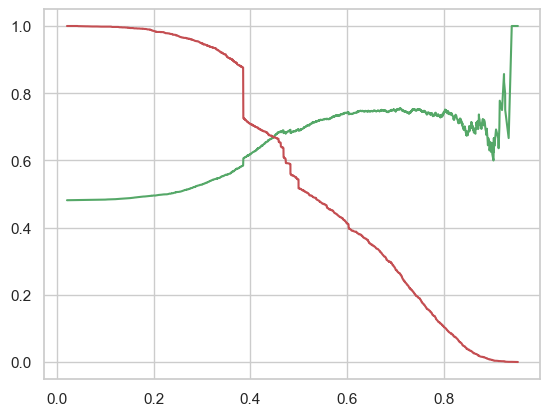

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299490,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.308556,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.134148,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.384835,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.468088,0,1,1,1,1,1,0,0,0,0,0,1


In [150]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6778749159381304

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1574,  738],
       [ 699, 1450]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
TP/(TP+FP)

0.6627056672760512

In [154]:
TP/(TP+FN)

0.6747324336900884

#### Let's make predictions on  test set.

In [155]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [156]:
y_test_pred[:10]

4771    0.462391
6122    0.150022
9202    0.556414
6570    0.592075
2668    0.466664
4233    0.468088
3368    0.790555
9091    0.640982
5972    0.360915
3631    0.481031
dtype: float64

In [157]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
y_pred_1.head()

,0
4771,0.462391
6122,0.150022
9202,0.556414
6570,0.592075
2668,0.466664


In [159]:
y_test_df2 = pd.DataFrame(y_test)

In [160]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df2.reset_index(drop=True, inplace=True)

In [161]:
y_pred_final = pd.concat([y_test_df2, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,Converted,0
0,1,0.462391
1,0,0.150022
2,0,0.556414
3,1,0.592075
4,1,0.466664


In [163]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [164]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.462391
1,0,0.150022
2,0,0.556414
3,1,0.592075
4,1,0.466664


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [166]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.462391,1
1,0,0.150022,0
2,0,0.556414,1
3,1,0.592075,1
4,1,0.466664,1


In [167]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6778242677824268

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[679, 317],
       [299, 617]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Calculate Precision

TP/(TP+FP)

0.6605995717344754

In [171]:
# Calculate Recall

TP/(TP+FN)

0.6735807860262009